# *다중 선형 회귀*

다수의 x로부터 y를 예측

# 

## *Pytorch*

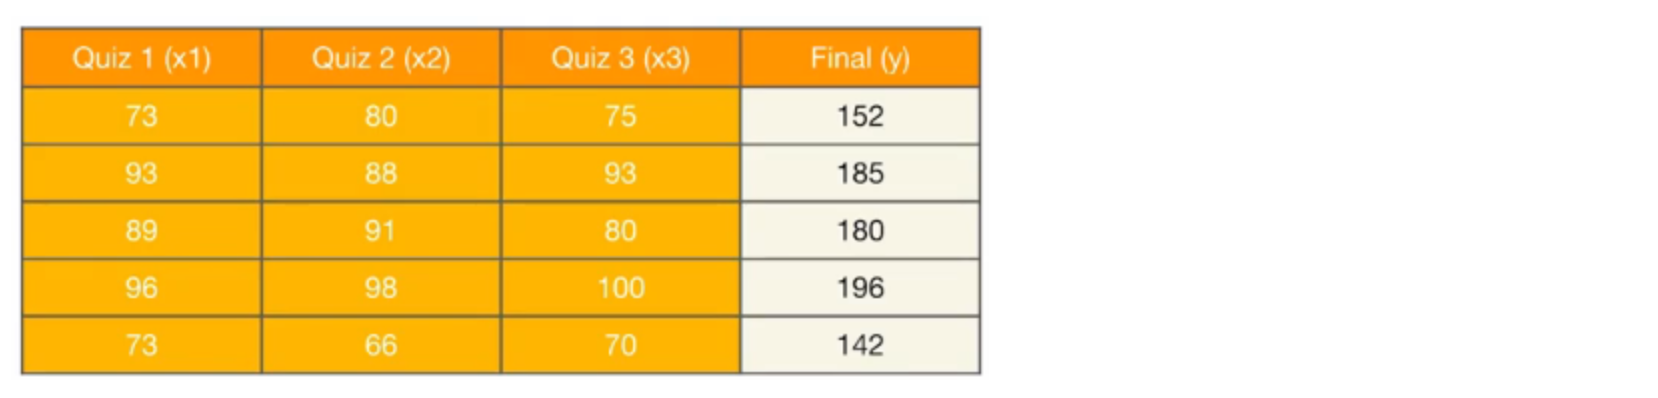
독립 변수 x의 개수가 3개<br>
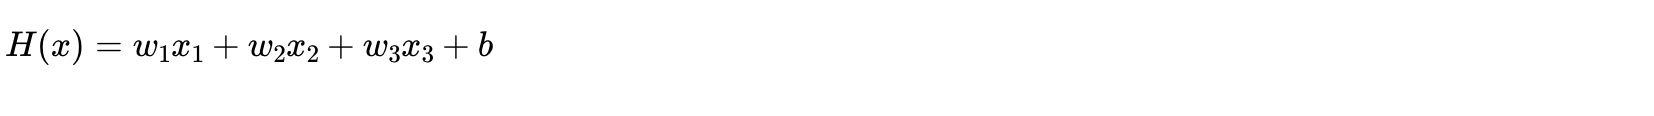

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
torch.manual_seed(1)

In [3]:
# 위 식에 따른 다중 선형 회귀 데이터
x1_train = torch.Tensor([[73], [93], [89], [96], [73]])
x2_train = torch.Tensor([[80], [88], [91], [98], [66]])
x3_train = torch.Tensor([[75], [93], [90], [100], [70]])
y_train = torch.Tensor([[152], [185], [180], [196], [142]])

In [4]:
# W, b
w1 = torch.zeros(1, requires_grad=True)
w2 = torch.zeros(1, requires_grad=True)
w3 = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [5]:
# optimizer
optimizer = optim.SGD([w1, w2, w3, b], lr=1e-5)

In [9]:
# 경사 하강법 1000회
nb_epochs = 1000
for epoch in range(nb_epochs + 1):
    # H(x) 계산
    hypothesis = x1_train * w1 + x2_train * w2 + x3_train * w3 + b
    
    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)
    
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 100번 마다 로그 출력
    if epoch % 100 == 0:
        print(f'{epoch}Epoch → w1 : {w1}, w2 : {w2}, w3 : {w3}, b : {b}, cost : {cost}')
        print("------------------------------------------------------------------------------")

0Epoch → w1 : tensor([0.7572], requires_grad=True), w2 : tensor([0.5713], requires_grad=True), w3 : tensor([0.6821], requires_grad=True), b : tensor([0.0106], requires_grad=True), cost : 0.7536495327949524
------------------------------------------------------------------------------
100Epoch → w1 : tensor([0.7606], requires_grad=True), w2 : tensor([0.5678], requires_grad=True), w3 : tensor([0.6822], requires_grad=True), b : tensor([0.0107], requires_grad=True), cost : 0.7296799421310425
------------------------------------------------------------------------------
200Epoch → w1 : tensor([0.7639], requires_grad=True), w2 : tensor([0.5644], requires_grad=True), w3 : tensor([0.6822], requires_grad=True), b : tensor([0.0109], requires_grad=True), cost : 0.7069304585456848
------------------------------------------------------------------------------
300Epoch → w1 : tensor([0.7672], requires_grad=True), w2 : tensor([0.5611], requires_grad=True), w3 : tensor([0.6823], requires_grad=True), b

# 

# *Improvement*

### *벡터와 행렬 연산으로 바꾸기*

x의 개수가 3개라 아래와 같이 정의하였다<br>
x1_train = torch.Tensor([[73], [93], [89], [96], [73]])<br>
x2_train = torch.Tensor([[80], [88], [91], [98], [66]])<br>
x3_train = torch.Tensor([[75], [93], [90], [100], [70]])<br>
y_train = torch.Tensor([[152], [185], [180], [196], [142]])<br><br>
그런데 x의 개수가 만일 1,000개라면 x1_train ~ x1000_train, w1 ~ w1000을 모두 선언해야 할 것이다<br>
이를 해결하기 위해 <big><b>행렬 곱셈 연산</b></big>을 사용

<br><br>행렬 곱셉 과정에서 이루어지는 벡터 연산을 <big><big><b>벡터의 내적(Dot Product)</b></big></big>라고 함
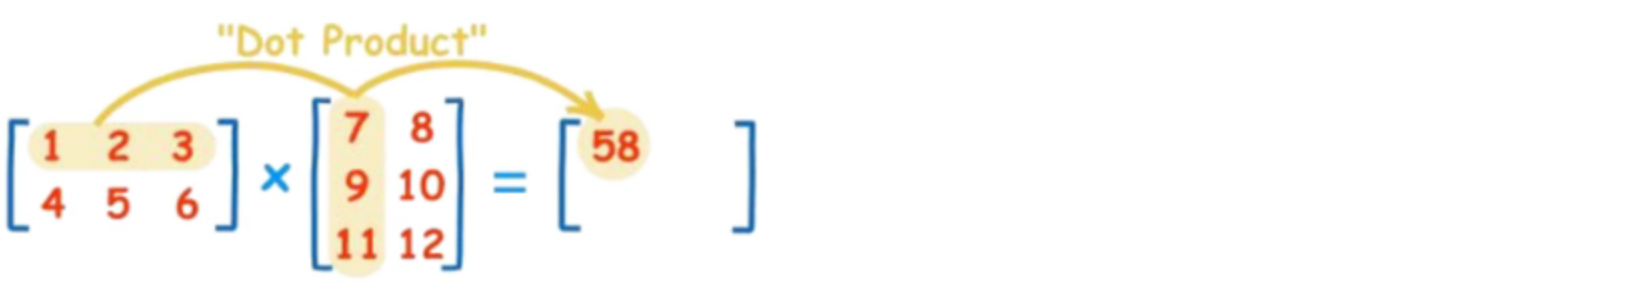

### *벡터 연산*

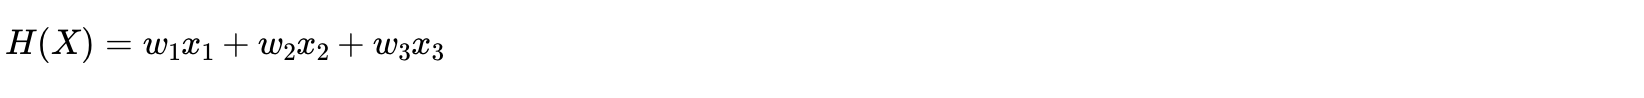
위 식은 아래와 같이 두 벡터의 내적으로 표현할 수 있다
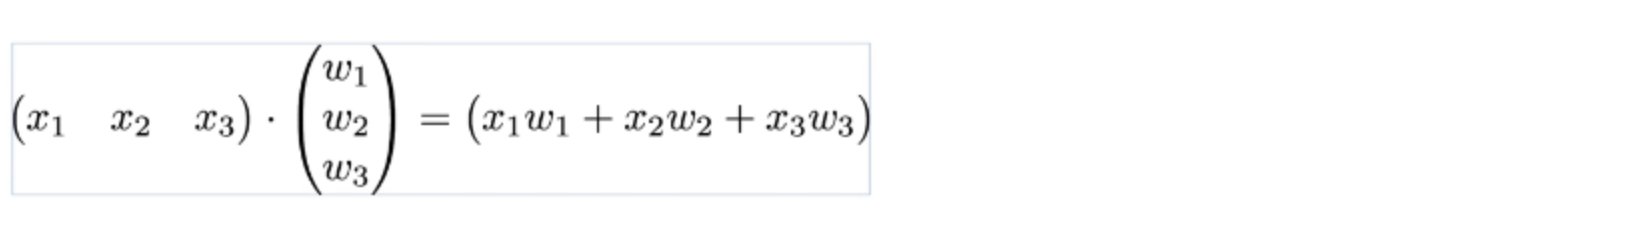
두 벡터를 각각 X, W로 표현한 가설
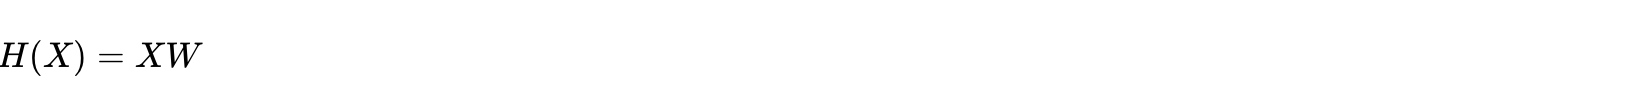

### *행렬 연산을 고려한 Pytorch 구현*

In [10]:
# 이전 code
x1_train = torch.Tensor([[73], [93], [89], [96], [73]])
x2_train = torch.Tensor([[80], [88], [91], [98], [66]])
x3_train = torch.Tensor([[75], [93], [90], [100], [70]])
y_train = torch.Tensor([[152], [185], [180], [196], [142]])

# 개선 code
x_train  =  torch.FloatTensor([[73,  80,  75],
                               [93,  88,  93],
                               [89,  91,  80],
                               [96,  98,  100],
                               [73,  66,  70]])
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

In [11]:
print(f"x_train : {x_train.shape}")
print(f"y_train : {y_train.shape}")

x_train : torch.Size([5, 3])
y_train : torch.Size([5, 1])


In [12]:
# W, b
W = torch.zeros((3, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

x_train의 데이터 shape은 (5, 3)으로 <u>행렬 곱셈이 성립되려면</u> <b>좌측 열의 크기와 우측 행의 크기가 일치해야함</b>

In [13]:
# optimizer 설정
optimizer = optim.SGD([W, b], lr=1e-5)

In [15]:
nb_epochs = 100
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    # 편향 b는 브로드 캐스팅되어 각 샘플에 더해집니다.
    hypothesis = x_train.matmul(W) + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} hypothesis: {} Cost: {:.6f}'.format(
        epoch, nb_epochs, hypothesis.squeeze().detach(), cost.item()
    ))

Epoch    0/100 hypothesis: tensor([154.0543, 185.1140, 175.7470, 198.6150, 141.2166]) Cost: 5.954494
Epoch    1/100 hypothesis: tensor([154.0546, 185.1143, 175.7486, 198.6150, 141.2171]) Cost: 5.951927
Epoch    2/100 hypothesis: tensor([154.0547, 185.1143, 175.7500, 198.6147, 141.2173]) Cost: 5.949370
Epoch    3/100 hypothesis: tensor([154.0546, 185.1142, 175.7512, 198.6143, 141.2175]) Cost: 5.946794
Epoch    4/100 hypothesis: tensor([154.0546, 185.1140, 175.7523, 198.6138, 141.2177]) Cost: 5.944210
Epoch    5/100 hypothesis: tensor([154.0545, 185.1137, 175.7535, 198.6133, 141.2178]) Cost: 5.941589
Epoch    6/100 hypothesis: tensor([154.0543, 185.1135, 175.7545, 198.6127, 141.2178]) Cost: 5.939054
Epoch    7/100 hypothesis: tensor([154.0542, 185.1132, 175.7556, 198.6122, 141.2179]) Cost: 5.936491
Epoch    8/100 hypothesis: tensor([154.0541, 185.1129, 175.7567, 198.6116, 141.2180]) Cost: 5.933901
Epoch    9/100 hypothesis: tensor([154.0539, 185.1126, 175.7578, 198.6110, 141.2180]) Cost: